In [7]:
# Create a sample log file with provided log data
log_data = """192.168.1.1 - - [03/Dec/2024:10:12:34 +0000] "GET /home HTTP/1.1" 200 512
203.0.113.5 - - [03/Dec/2024:10:12:35 +0000] "POST /login HTTP/1.1" 401 128 "Invalid credentials"
10.0.0.2 - - [03/Dec/2024:10:12:36 +0000] "GET /about HTTP/1.1" 200 256
192.168.1.1 - - [03/Dec/2024:10:12:37 +0000] "GET /contact HTTP/1.1" 200 312
198.51.100.23 - - [03/Dec/2024:10:12:38 +0000] "POST /register HTTP/1.1" 200 128
203.0.113.5 - - [03/Dec/2024:10:12:39 +0000] "POST /login HTTP/1.1" 401 128 "Invalid credentials"
192.168.1.100 - - [03/Dec/2024:10:12:40 +0000] "POST /login HTTP/1.1" 401 128 "Invalid credentials"
10.0.0.2 - - [03/Dec/2024:10:12:41 +0000] "GET /dashboard HTTP/1.1" 200 1024
198.51.100.23 - - [03/Dec/2024:10:12:42 +0000] "GET /about HTTP/1.1" 200 256
192.168.1.1 - - [03/Dec/2024:10:12:43 +0000] "GET /dashboard HTTP/1.1" 200 1024
203.0.113.5 - - [03/Dec/2024:10:12:44 +0000] "POST /login HTTP/1.1" 401 128 "Invalid credentials"
203.0.113.5 - - [03/Dec/2024:10:12:45 +0000] "POST /login HTTP/1.1" 401 128 "Invalid credentials"
192.168.1.100 - - [03/Dec/2024:10:12:46 +0000] "POST /login HTTP/1.1" 401 128 "Invalid credentials"
10.0.0.2 - - [03/Dec/2024:10:12:47 +0000] "GET /profile HTTP/1.1" 200 768
192.168.1.1 - - [03/Dec/2024:10:12:48 +0000] "GET /home HTTP/1.1" 200 512
198.51.100.23 - - [03/Dec/2024:10:12:49 +0000] "POST /feedback HTTP/1.1" 200 128
203.0.113.5 - - [03/Dec/2024:10:12:50 +0000] "POST /login HTTP/1.1" 401 128 "Invalid credentials"
192.168.1.1 - - [03/Dec/2024:10:12:51 +0000] "GET /home HTTP/1.1" 200 512
198.51.100.23 - - [03/Dec/2024:10:12:52 +0000] "GET /about HTTP/1.1" 200 256
203.0.113.5 - - [03/Dec/2024:10:12:53 +0000] "POST /login HTTP/1.1" 401 128 "Invalid credentials"
192.168.1.100 - - [03/Dec/2024:10:12:54 +0000] "POST /login HTTP/1.1" 401 128 "Invalid credentials"
10.0.0.2 - - [03/Dec/2024:10:12:55 +0000] "GET /contact HTTP/1.1" 200 512
198.51.100.23 - - [03/Dec/2024:10:12:56 +0000] "GET /home HTTP/1.1" 200 512
192.168.1.100 - - [03/Dec/2024:10:12:57 +0000] "POST /login HTTP/1.1" 401 128 "Invalid credentials"
203.0.113.5 - - [03/Dec/2024:10:12:58 +0000] "POST /login HTTP/1.1" 401 128 "Invalid credentials"
10.0.0.2 - - [03/Dec/2024:10:12:59 +0000] "GET /dashboard HTTP/1.1" 200 1024
192.168.1.1 - - [03/Dec/2024:10:13:00 +0000] "GET /about HTTP/1.1" 200 256
198.51.100.23 - - [03/Dec/2024:10:13:01 +0000] "POST /register HTTP/1.1" 200 128
203.0.113.5 - - [03/Dec/2024:10:13:02 +0000] "POST /login HTTP/1.1" 401 128 "Invalid credentials"
192.168.1.100 - - [03/Dec/2024:10:13:03 +0000] "POST /login HTTP/1.1" 401 128 "Invalid credentials"
10.0.0.2 - - [03/Dec/2024:10:13:04 +0000] "GET /profile HTTP/1.1" 200 768
198.51.100.23 - - [03/Dec/2024:10:13:05 +0000] "GET /about HTTP/1.1" 200 256
192.168.1.1 - - [03/Dec/2024:10:13:06 +0000] "GET /home HTTP/1.1" 200 512
198.51.100.23 - - [03/Dec/2024:10:13:07 +0000] "POST /feedback HTTP/1.1" 200 128"""

# Save the log content to the sample.log file
with open('sample.log', 'w') as file:
    file.write(log_data)

print("The 'sample.log' file has been created successfully.")

The 'sample.log' file has been created successfully.


In [8]:
# Import necessary libraries
from collections import defaultdict
import csv

In [10]:
# Function to load and read log data from a file
def load_log_data(file_path):
    with open(file_path, 'r') as file:
        return [line.strip() for line in file]

# Read the log file
log_data = load_log_data('sample.log')
print("Log data successfully loaded.")

Log data successfully loaded.


In [11]:
# Function to calculate the number of requests from each IP
def calculate_requests_by_ip(log_lines):
    ip_request_map = defaultdict(int)
    for entry in log_lines:
        ip = entry.split()[0]  # Extract the IP address
        ip_request_map[ip] += 1
    return ip_request_map

# Compute request counts
ip_request_summary = calculate_requests_by_ip(log_data)
print("Request counts per IP address:")
for ip, count in ip_request_summary.items():
    print(f"{ip}: {count}")

Request counts per IP address:
192.168.1.1: 7
203.0.113.5: 8
10.0.0.2: 6
198.51.100.23: 8
192.168.1.100: 5


In [12]:
# Function to identify the most accessed endpoint
def find_top_endpoint(log_lines):
    endpoint_frequency = defaultdict(int)
    for entry in log_lines:
        try:
            endpoint = entry.split('"')[1].split()[1]  # Extract endpoint from the log
            endpoint_frequency[endpoint] += 1
        except IndexError:
            continue  # Skip malformed lines
    top_endpoint = max(endpoint_frequency.items(), key=lambda x: x[1])
    return top_endpoint

# Get the most accessed endpoint
most_accessed_endpoint = find_top_endpoint(log_data)
print(f"Most Accessed Endpoint: {most_accessed_endpoint[0]} ({most_accessed_endpoint[1]} times)")

Most Accessed Endpoint: /login (13 times)


In [13]:
# Function to detect potential brute force attempts or suspicious activity
def identify_suspicious_ips(log_lines, threshold=10):
    failed_attempts = defaultdict(int)
    for entry in log_lines:
        if '401' in entry:  # Look for unauthorized access
            ip = entry.split()[0]
            failed_attempts[ip] += 1
    return {ip: count for ip, count in failed_attempts.items() if count > threshold}

# Detect suspicious activity
suspicious_ips = identify_suspicious_ips(log_data)
print("Suspicious IPs with high failed attempts:")
for ip, count in suspicious_ips.items():
    print(f"{ip}: {count} failed attempts")

Suspicious IPs with high failed attempts:


In [14]:
# Function to save analysis results into a CSV file
def write_results_to_csv(ip_summary, top_endpoint, suspicious_activity, output_file='log_results.csv'):
    with open(output_file, mode='w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        # Write IP requests
        writer.writerow(["IP Address", "Request Count"])
        for ip, count in ip_summary.items():
            writer.writerow([ip, count])
        writer.writerow([])

        # Write most accessed endpoint
        writer.writerow(["Most Accessed Endpoint", "Access Count"])
        writer.writerow([top_endpoint[0], top_endpoint[1]])
        writer.writerow([])

        # Write suspicious activity
        writer.writerow(["Suspicious IPs"])
        writer.writerow(["IP Address", "Failed Login Attempts"])
        for ip, count in suspicious_activity.items():
            writer.writerow([ip, count])

# Save results to file
write_results_to_csv(ip_request_summary, most_accessed_endpoint, suspicious_ips)
print("Results saved in log_results.csv")

Results saved in log_results.csv


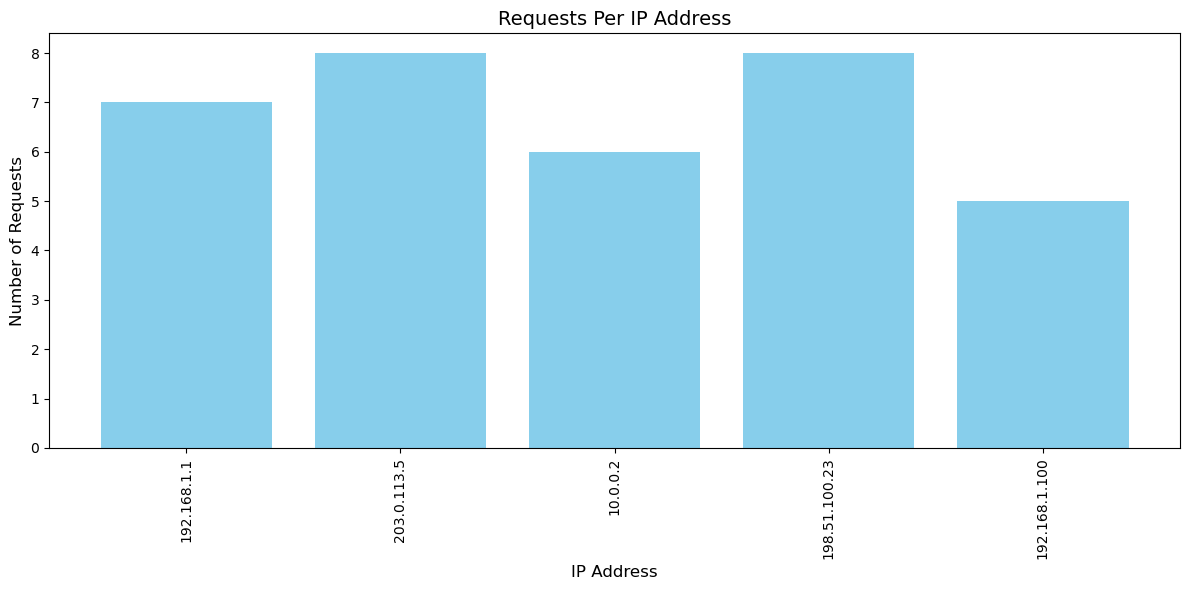

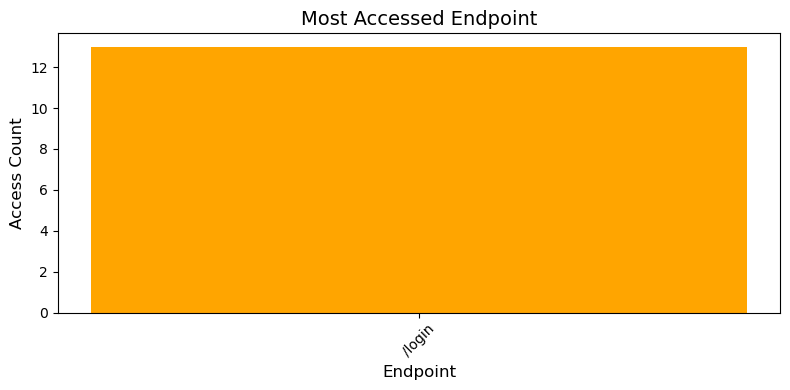

In [15]:
#Visualizing Data with Matplotlib

import matplotlib.pyplot as plt

# Function to plot IP request counts as a bar chart
def plot_ip_request_counts(ip_request_map):
    ip_addresses = list(ip_request_map.keys())
    request_counts = list(ip_request_map.values())

    plt.figure(figsize=(12, 6))
    plt.bar(ip_addresses, request_counts, color='skyblue')
    plt.xlabel('IP Address', fontsize=12)
    plt.ylabel('Number of Requests', fontsize=12)
    plt.title('Requests Per IP Address', fontsize=14)
    plt.xticks(rotation=90, fontsize=10)
    plt.tight_layout()
    plt.show()

# Plot the request counts
plot_ip_request_counts(ip_request_summary)

# Function to plot most accessed endpoint data
def plot_endpoint_access(endpoint_data):
    endpoints = [endpoint_data[0]]
    access_counts = [endpoint_data[1]]

    plt.figure(figsize=(8, 4))
    plt.bar(endpoints, access_counts, color='orange')
    plt.xlabel('Endpoint', fontsize=12)
    plt.ylabel('Access Count', fontsize=12)
    plt.title('Most Accessed Endpoint', fontsize=14)
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()
    plt.show()

# Plot the most accessed endpoint
plot_endpoint_access(most_accessed_endpoint)

In [16]:
from ipywidgets import interact, IntSlider

# Function to dynamically filter suspicious IPs based on threshold
def dynamic_suspicious_activity_detection(threshold):
    filtered_suspicious_ips = {ip: count for ip, count in suspicious_ips.items() if count > threshold}
    if filtered_suspicious_ips:
        print(f"Suspicious IPs with more than {threshold} failed attempts:")
        for ip, count in filtered_suspicious_ips.items():
            print(f"{ip}: {count} failed attempts")
    else:
        print(f"No suspicious activity detected with threshold > {threshold}.")

# Create an interactive widget to adjust threshold
interact(
    dynamic_suspicious_activity_detection, 
    threshold=IntSlider(value=10, min=1, max=50, step=1, description='Threshold:')
);

interactive(children=(IntSlider(value=10, description='Threshold:', max=50, min=1), Output()), _dom_classes=('…